# Problema 2: Óptica Instrumental y Radiometría

Se realiza la calibración de un espectrómetro, de la cual se adjunta el espectro de una lámpara calibrada en irradiancia (certificada para 50cm de distancia) y la medida bruta realizada por un espectrómetro a esa lámpara situada a 75cm. 

Posteriormente se emplea el espectrómetro para medir la irradiancia de otra lámpara. Se adjunta la medida bruta de esta lámpara 2. 

Por último, se adjunta la eficacia luminosa fotópica de la CIE - 1924. 

Representar las curvas.

Calcular:

a) La curva de calibración espectral del instrumento.

b) La irradiancia total espectral e integrada que llega de la lámpara 2. 

c) Iluminancia y eficacia luminosa de la lámpara 2. 

d) Fracción de la irradiancia y de la iluminación en los siguientes intervalos espectrales:

380-830 nm

450-700 nm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_1=pd.read_csv('irradiancia_lampara_certificadaNIST.txt',sep='\s+')
df_1.head()

,Wavelength,LAMP_irradiance_NIST(W/m2/nm)
0,350,0.007067
1,351,0.007241
2,352,0.007419
3,353,0.007599
4,354,0.007782


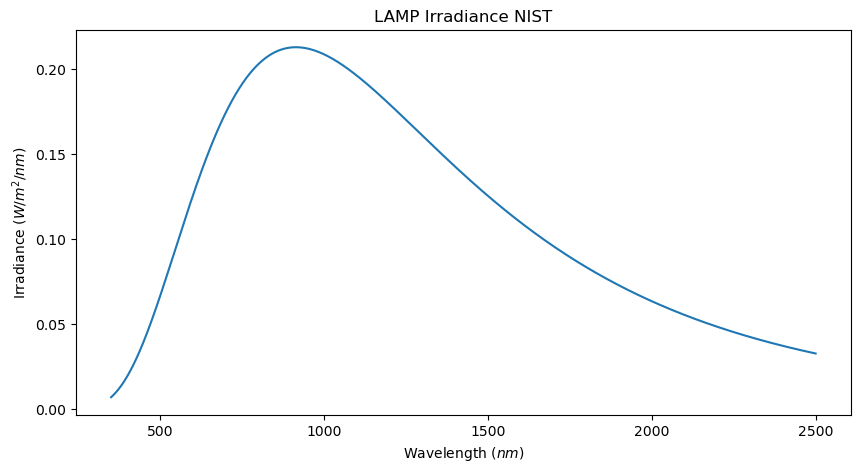

In [3]:
plt.figure(figsize=(10,5))
plt.plot(df_1['Wavelength'],df_1['LAMP_irradiance_NIST(W/m2/nm)'])
plt.xlabel(r'Wavelength $(nm)$')
plt.ylabel(r'Irradiance $(W/m^2/nm)$')
plt.title('LAMP Irradiance NIST')
plt.show()

Estos datos son los correspondientes a la irradiancia espectral calibrada (a 50 cm) por los valores proporcionados por el NIST y la irradiancia espectral cuyas unidades son $W/m^2/nm$ describe la densidad de radiación emitida por la lámpara, en este caso en función de la longitud de onda.

In [4]:
df_2=pd.read_csv('medida_bruta_lamparaNIST.txt',sep='\s+')
df_2.head()

,Wavelength,RAW_spectrum_average_lamp
0,350,70.987413
1,351,72.665734
2,352,75.116083
3,353,77.897221
4,354,80.887414


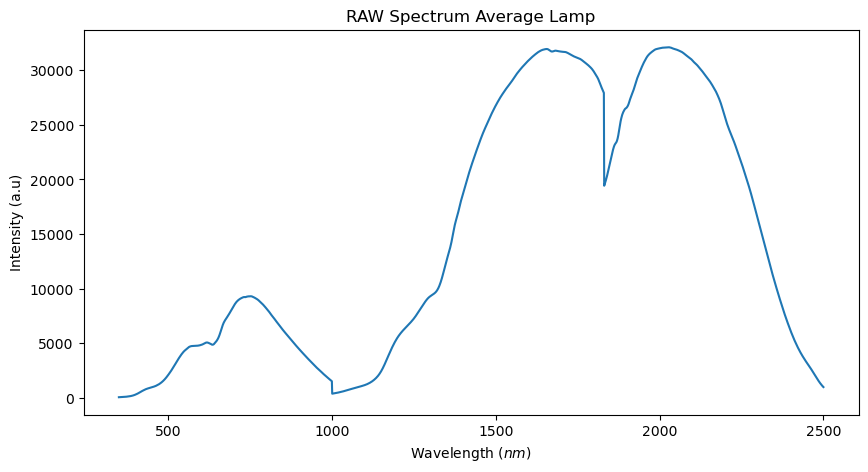

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df_2['Wavelength'],df_2['RAW_spectrum_average_lamp'])
plt.xlabel(r'Wavelength $(nm)$')
plt.ylabel('Intensity (a.u)')
plt.title('RAW Spectrum Average Lamp')
plt.show()

Estos datos son los correspondientes a la medida de la primera lámpara (a 75 cm) los cuales reflejan la respuesta del espectrómetro con respecto a la radiación emitida por la fuente luminosa, a estos datos no se les han aplicado las correciones por lo que sus unidades serían las relativas del detector.

In [6]:
df_3=pd.read_csv('medida_bruta_lampara2.txt')
df_3.head()

,Wavelength(nm),raw_data
0,350.0,9.510489
1,351.0,8.111888
2,352.0,9.930070
3,353.0,11.000000
4,354.0,11.000000


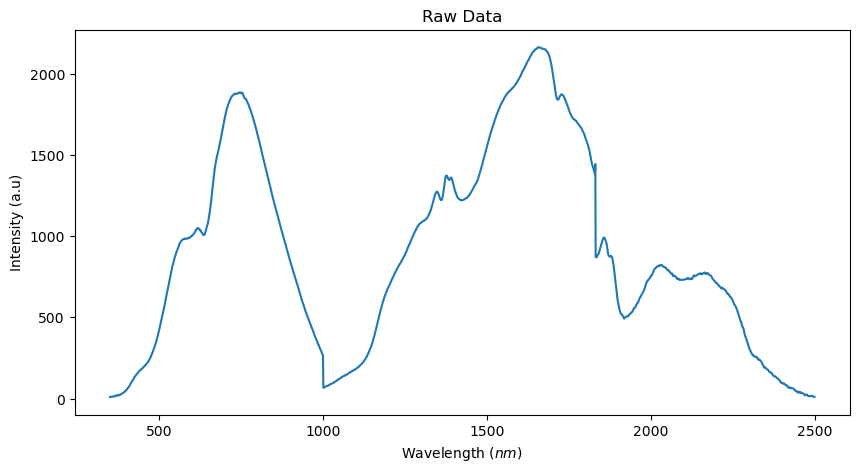

In [7]:
plt.figure(figsize=(10,5))
plt.plot(df_3['Wavelength(nm)'],df_3['raw_data'])
plt.xlabel(r'Wavelength $(nm)$')
plt.ylabel('Intensity (a.u)')
plt.title('Raw Data')
plt.show()

Estos datos corresponden a los obtenidos de la medición de la segunda lámpara y al igual que en el caso anterior corresponden a las medidas relativas del detector que reflejan a respuesta del espectrómetro a la radiación emitida por la lámpara.

In [8]:
df_4=pd.read_csv('CIE1924.txt',sep='\s+')
df_4.head()

,WL(nm),V(lambda)
0,360,0.000004
1,361,0.000004
2,362,0.000005
3,363,0.000006
4,364,0.000006


In [9]:
max_index=df_4['V(lambda)'].idxmax()
max_WL=df_4.loc[max_index,'WL(nm)']
print(f'El valor máximo de V(lambda) se encuentra en la longitud de onda de: {max_WL} nm')

El valor máximo de V(lambda) se encuentra en la longitud de onda de: 555 nm


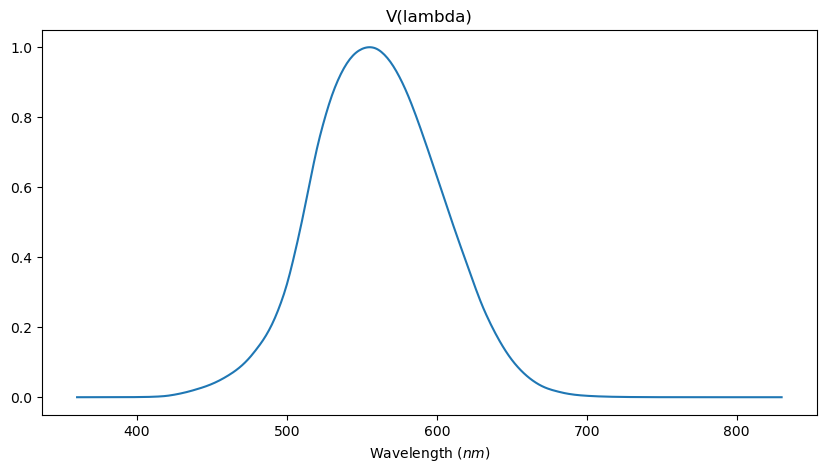

In [10]:
plt.figure(figsize=(10,5))
plt.plot(df_4['WL(nm)'],df_4['V(lambda)'])
plt.xlabel(r'Wavelength $(nm)$')
plt.title('V(lambda)')
plt.show()

Estos son los datos correspondientes a la eficicia fotópica definida por la CIE, la cual describe la sensibilidad del ojo humano con respecto al espectro visible (los datos están normalizados) y se observa un pico máximo a 555 nm que corresponde a la región de color verde en el espectro donde el ojo humano es más eficiente.

### a) La curva de calibración espectral del instrumento.

La curva de calibración espectral se utiliza para corregir las mediciones brutas realizadas por un espectrómetro, esto se hace ajustando los valores reales con respecto a una fuente de referencia calibrada ya que este proceso permite compensar las diferencias de sensibilidad del espectrómetro a diferentes longitudes de onda.

En este caso, como la medida bruta fue realizada a 75 cm de la lámpara calibrada, y la irradiancia certificada está dada para 50 cm, es necesario corregir los valores brutos utilizando la ley del inverso del cuadrado de la distancia. 

La corrección la podemos realizar como:

$$\text{raw_corrected} = \text{LAMP_irradiance_NIST} \cdot \left(\frac{75}{50}\right)^2$$

La curva de calibración espectral se calcula como:

$$\text{curva_espectral} = \frac{\text{LAMP_irradiance_NIST}}{\text{RAW_corrected}}$$

Se puede ver que la curva de calibración es adimensional y esta curva nos servirá para corregir las mediciones de la lámpara 2.

In [11]:
df_5=pd.merge(df_1,df_2, on='Wavelength')
df_5.head()

,Wavelength,LAMP_irradiance_NIST(W/m2/nm),RAW_spectrum_average_lamp
0,350,0.007067,70.987413
1,351,0.007241,72.665734
2,352,0.007419,75.116083
3,353,0.007599,77.897221
4,354,0.007782,80.887414


In [12]:
df_5['RAW_corrected']=df_5['RAW_spectrum_average_lamp']*(75/50)**2
df_5.head()

,Wavelength,LAMP_irradiance_NIST(W/m2/nm),RAW_spectrum_average_lamp,RAW_corrected
0,350,0.007067,70.987413,159.721679
1,351,0.007241,72.665734,163.497902
2,352,0.007419,75.116083,169.011186
3,353,0.007599,77.897221,175.268748
4,354,0.007782,80.887414,181.996681


In [13]:
df_5['curva_espectral']=df_5['LAMP_irradiance_NIST(W/m2/nm)']/df_5['RAW_corrected']
df_5.head()

,Wavelength,LAMP_irradiance_NIST(W/m2/nm),RAW_spectrum_average_lamp,RAW_corrected,curva_espectral
0,350,0.007067,70.987413,159.721679,0.000044
1,351,0.007241,72.665734,163.497902,0.000044
2,352,0.007419,75.116083,169.011186,0.000044
3,353,0.007599,77.897221,175.268748,0.000043
4,354,0.007782,80.887414,181.996681,0.000043


In [14]:
max_index2=df_5['curva_espectral'].idxmax()
max_WL2=df_5.loc[max_index2,'Wavelength']
print(f'El valor máximo de la curva espectral de calibración se encuentra en la longitud de onda de: {max_WL2} nm')

El valor máximo de la curva espectral de calibración se encuentra en la longitud de onda de: 1001 nm


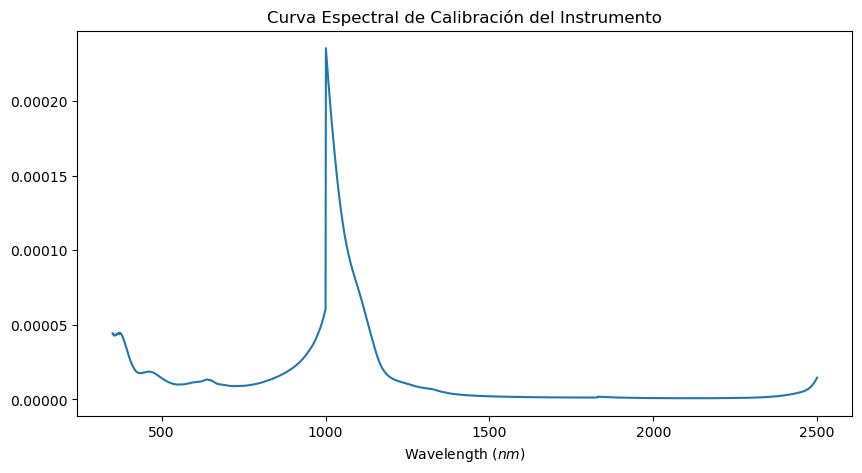

In [15]:
plt.figure(figsize=(10,5))
plt.plot(df_5['Wavelength'],df_5['curva_espectral'])
plt.xlabel(r'Wavelength $(nm)$')
plt.title('Curva Espectral de Calibración del Instrumento')
plt.show()

Que el valor máximo de la curva espectral de calibración del instrumento se encuentre en la longitud de onda de $1001 nm$ indica que el instrumento tiene una mayor sensibilidad en el infrarrojo cercano.

### b) La irradiancia total espectral e integrada que llega de la lámpara 2.

La irradiancia total que llega de una fuente la podemos obtener integrando la irradiancia espectral (irradiancia_espectral) en todo el rango de longitudes de onda medido. La irradiancia espectral la podemos calcular multiplicando la medida bruta (raw_data), en este caso de la lámpara 2 por la curva de calibración anteriormente calculada (curva_espectral). Y la irradiancia total integrada en este caso la podemos obtener sumando la irradiancia espectral (irradiancia_espectral) que sería como integrar esta misma en todas las longitudes de onda.

La irradiancia espectral es:

$$\text{irradiancia_espectral} = {\text{curva_espectral}} \cdot {\text{raw_data}}$$

Esta tendrá unidades en $W/m^2/nm$, esto quiere decir que los datos en raw_data que son las medidas brutas del detector se transforman a las unidades mencionadas al multiplicar por la curva de calibración.

La irradiancia total integrada es:

$$\text{irradiancia_total} = \sum \text{Irradiancia espectral}$$

Esta tendrá unidades de $W/m^2$ ya que al sumar la irradiacia espectral en función de la longitud de onda, estas unidades $(nm)$ desaparecen porque se consideran en el intervalo sumado.

In [16]:
df_5['raw_data']=df_3['raw_data']
df_5.head()

,Wavelength,LAMP_irradiance_NIST(W/m2/nm),RAW_spectrum_average_lamp,RAW_corrected,curva_espectral,raw_data
0,350,0.007067,70.987413,159.721679,0.000044,9.510489
1,351,0.007241,72.665734,163.497902,0.000044,8.111888
2,352,0.007419,75.116083,169.011186,0.000044,9.930070
3,353,0.007599,77.897221,175.268748,0.000043,11.000000
4,354,0.007782,80.887414,181.996681,0.000043,11.000000


In [17]:
df_5['irradiancia_espectral']=df_5['curva_espectral']*df_5['raw_data']
df_5.head()

,Wavelength,LAMP_irradiance_NIST(W/m2/nm),RAW_spectrum_average_lamp,RAW_corrected,curva_espectral,raw_data,irradiancia_espectral
0,350,0.007067,70.987413,159.721679,0.000044,9.510489,0.000421
1,351,0.007241,72.665734,163.497902,0.000044,8.111888,0.000359
2,352,0.007419,75.116083,169.011186,0.000044,9.930070,0.000436
3,353,0.007599,77.897221,175.268748,0.000043,11.000000,0.000477
4,354,0.007782,80.887414,181.996681,0.000043,11.000000,0.000470


In [18]:
max_index3=df_5['irradiancia_espectral'].idxmax()
max_WL3=df_5.loc[max_index3,'Wavelength']
print(f'El valor máximo de la irradiancia espectral se encuentra en la longitud de onda de: {max_WL3} nm')

El valor máximo de la irradiancia espectral se encuentra en la longitud de onda de: 857 nm


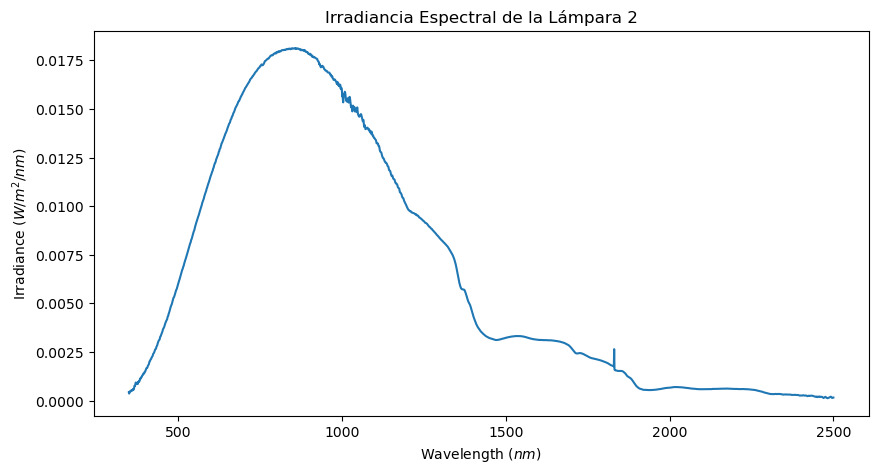

In [19]:
plt.figure(figsize=(10,5))
plt.plot(df_5['Wavelength'],df_5['irradiancia_espectral'])
plt.xlabel(r'Wavelength $(nm)$')
plt.ylabel(r'Irradiance $(W/m^2/nm)$')
plt.title('Irradiancia Espectral de la Lámpara 2')
plt.show()

Se puede observar en el gráfico que la irradiancia espectral disminuye tanto en el ultravioleta como en el infrarrojo lejano, pero tiene mayor concentración tanto en el infrarrojo cercano como en el espectro visible.

In [20]:
irradiancia_total=df_5['irradiancia_espectral'].sum()
print('La irradiancia total integrada que llega la lámpara 2 es:',round(irradiancia_total,4),'W/m^2')

La irradiancia total integrada que llega la lámpara 2 es: 13.7358 W/m^2


### c) Iluminancia y eficacia luminosa de la lámpara 2

La iluminancia mide la cantidad de luz visible percibida por el ojo humano que llega a una superficie. Para calcularla ponderamos la irradiancia espectral (irradiancia_espectral) con la función de eficiencia luminosa (V(lambda)) y se obtiene la irradiancia espectral ponderada (irradiancia_ponderada). Además, utiliziamos el valor $683 lm/W$ para convertir la energía radiante en lúmenes (tiene que ver con la sensibilidad máxima del ojo humano en $555 nm$. La eficacia luminosa mide la eficiencia de la lámpara al convertir energía radiante en luz visible y en este caso es la relación entre la iluminancia y la irradiancia total integrada calculada previamente (irradiancia_total).

La irradiancia ponderada espectral es:

$$ \text{irradiancia_ponderada} = \text{irradancia_espectral} \cdot \text{V(lambda)}$$

Dado que V(lambda) es adimensional esta irradiancia "ponderada" tiene las unidades $W/m^2/nm$.

La iluminancia de la lámpara es:

$$ \text{iluminancia} = 683 \cdot \sum \text{irradiancia_ponderada}$$

Las unidades del sumatorio son $W/m^2$ ya que se ha sumado (integrado) con respecto a la longitud de onda y por las unidades del valor 683 llegamos a que la iluminancia tiene unidades de $lm/m^2$.

La eficacia luminosa de la lámpara es:

$$ \text{eficacia} = \frac{\text{iluminancia}}{\text{irradiancia_total}} $$

Las unidades de la irradiancia total integrada eran $W/m^2$, entonces las unidades de la eficacia luminosa es $lm/W$.

In [21]:
df_6 = pd.merge(df_5, df_4, left_on='Wavelength', right_on='WL(nm)')
df_6.drop('WL(nm)',axis=1,inplace=True)
df_6.head()

,Wavelength,LAMP_irradiance_NIST(W/m2/nm),RAW_spectrum_average_lamp,RAW_corrected,curva_espectral,raw_data,irradiancia_espectral,V(lambda)
0,360,0.008945,92.361539,207.813462,0.000043,12.000000,0.000517,0.000004
1,361,0.009149,93.760139,210.960312,0.000043,12.000000,0.000520,0.000004
2,362,0.009357,95.662238,215.240034,0.000043,13.258741,0.000576,0.000005
3,363,0.009567,97.390209,219.127971,0.000044,13.671329,0.000597,0.000006
4,364,0.009781,98.925873,222.583214,0.000044,13.000000,0.000571,0.000006


In [22]:
df_6['irradiancia_ponderada']=df_6['irradiancia_espectral']*df_6['V(lambda)']
df_6.head()

,Wavelength,LAMP_irradiance_NIST(W/m2/nm),RAW_spectrum_average_lamp,RAW_corrected,curva_espectral,raw_data,irradiancia_espectral,V(lambda),irradiancia_ponderada
0,360,0.008945,92.361539,207.813462,0.000043,12.000000,0.000517,0.000004,2.023179e-09
1,361,0.009149,93.760139,210.960312,0.000043,12.000000,0.000520,0.000004,2.286577e-09
2,362,0.009357,95.662238,215.240034,0.000043,13.258741,0.000576,0.000005,2.841305e-09
3,363,0.009567,97.390209,219.127971,0.000044,13.671329,0.000597,0.000006,3.302167e-09
4,364,0.009781,98.925873,222.583214,0.000044,13.000000,0.000571,0.000006,3.546563e-09


In [23]:
max_index4=df_6['irradiancia_ponderada'].idxmax()
max_WL4=df_6.loc[max_index4,'Wavelength']
print(f'El valor máximo de la irradiancia espectral "ponderada" se encuentra en la longitud de onda de: {max_WL4} nm')

El valor máximo de la irradiancia espectral "ponderada" se encuentra en la longitud de onda de: 568 nm


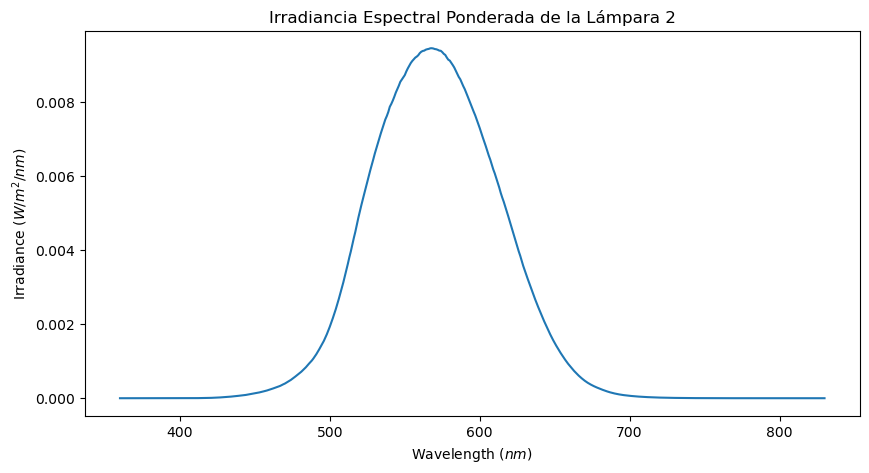

In [24]:
plt.figure(figsize=(10,5))
plt.plot(df_6['Wavelength'],df_6['irradiancia_ponderada'])
plt.xlabel(r'Wavelength $(nm)$')
plt.ylabel(r'Irradiance $(W/m^2/nm)$')
plt.title('Irradiancia Espectral Ponderada de la Lámpara 2')
plt.show()

El valor máximo se encuentra en $568 nm$ lo cual se encuentra en el rango del espectro visible, cercano donde el ojo humano tiene mayor sensibilidad $(555 nm)$ y la curva nos dice que la energía se percibe de forma desigual en el espectro visible ya que tanto el ultravioleta como el infrarrojo presentan una disminución.

In [25]:
iluminancia_total=683*df_6['irradiancia_ponderada'].sum()
print('La iluminancia de la lámpara 2 es:',round(iluminancia_total,4),'lm/m^2')

La iluminancia de la lámpara 2 es: 681.3674 lm/m^2


In [26]:
eficacia=iluminancia_total/irradiancia_total
print('La eficacia luminosa de la lámpara 2 es:',round(eficacia,4),'lm/W')

La eficacia luminosa de la lámpara 2 es: 49.6051 lm/W


### d) Fracción de la irradiancia y de la iluminación en los siguientes intervalos espectrales:

#### 380-830 nm

#### 450-700 nm

La fracción de irradiancia mide la proporción de la energía radiante total que está dentro de un intervalo espectral específico. Se calcula dividiendo la suma de la irradiancia espectral (irradiancia_espectral) dentro del intervalo entre la irradiancia total integrada (irradiancia_total).

La fracción de iluminación mide la proporción de la luz visible total emitida que está dentro de un intervalo espectral específico. Se calcula ponderando la irradiancia espectral (irradiancia_espectral) con la función de eficiencia luminosa (V(lambda) obteniendo la irradiancia espectral ponderada (irradiancia_ponderada), y dividiendo la iluminancia parcial entre la iluminancia total (iluminancia_total).

La fracción de la irradiancia es:

$$\text{fraccion_irradiancia} = \frac{\sum \text{irradiancia_espectral}}{\text{irradiancia_total}}$$

Tanto el sumatorio de la irradiancia espectral como la irradiancia total integrada tienen unidades de $W/m^2$ por lo que esta variable es adimensional.

La fracción de la iluminación es:

$$\text{fraccion_iluminancia} = \frac {683 \cdot \sum {\text{irradiancia_ponderada}}}{\text{iluminancia_total}}$$

Tanto el numerador como la iluminancia total tienen unidades de $lm/m^2$ por lo que esta variable también es adimensional.

In [27]:
df_7 = df_6[(df_6['Wavelength'] >= 380) & (df_6['Wavelength'] <= 830)]
df_7.head()

,Wavelength,LAMP_irradiance_NIST(W/m2/nm),RAW_spectrum_average_lamp,RAW_corrected,curva_espectral,raw_data,irradiancia_espectral,V(lambda),irradiancia_ponderada
20,380,0.013633,143.099304,321.973434,0.000042,22.405594,0.000949,0.000039,3.699871e-08
21,381,0.013901,147.924472,332.830062,0.000042,23.804195,0.000994,0.000043,4.257833e-08
22,382,0.014172,152.990213,344.227979,0.000041,24.000000,0.000988,0.000047,4.635731e-08
23,383,0.014447,158.065036,355.646331,0.000041,25.202797,0.001024,0.000052,5.281726e-08
24,384,0.014725,163.100000,366.975000,0.000040,28.000000,0.001124,0.000057,6.423908e-08


In [28]:
fraccion_irradiancia1=df_7['irradiancia_espectral'].sum()/irradiancia_total
print('La fracción de irradiancia en el intervalo (380-830 nm) es:',round(fraccion_irradiancia1,4))

La fracción de irradiancia en el intervalo (380-830 nm) es: 0.3571


In [29]:
fraccion_iluminancia1=683*(df_7['irradiancia_ponderada']).sum()/iluminancia_total
print('La fracción de la iluminancia en el intervalo (380-830 nm) es:',round(fraccion_iluminancia1,4))

La fracción de la iluminancia en el intervalo (380-830 nm) es: 1.0


La fracción de irradiancia en el intervalo $380-830 nm$ es de 0.3571, esto quiere decir que alrededor del 35.71% de la energía radiante tota emitida se encuentra dentro de este rango, también la fracción de iluminancia en este mismo intervalo nos da un valor de 1.0 lo que indica que el 100% (casi el 100%) de la luz que percibe el ojo humano se encuentra dentro de este rango.

In [30]:
df_8 = df_6[(df_6['Wavelength'] >= 450) & (df_6['Wavelength'] <= 700)]
df_8.head()

,Wavelength,LAMP_irradiance_NIST(W/m2/nm),RAW_spectrum_average_lamp,RAW_corrected,curva_espectral,raw_data,irradiancia_espectral,V(lambda),irradiancia_ponderada
90,450,0.040094,978.719574,2202.119042,0.000018,189.237762,0.003445,0.038000,0.000131
91,451,0.040576,986.481818,2219.584090,0.000018,190.636368,0.003485,0.039847,0.000139
92,452,0.041060,995.537775,2239.959993,0.000018,192.552444,0.003530,0.041768,0.000147
93,453,0.041547,1004.701392,2260.578132,0.000018,195.083923,0.003585,0.043766,0.000157
94,454,0.042036,1013.093011,2279.459275,0.000018,198.580414,0.003662,0.045843,0.000168


In [31]:
fraccion_irradiancia2=df_8['irradiancia_espectral'].sum()/irradiancia_total
print('La fracción de irradiancia en el intervalo (450-700 nm) es:',round(fraccion_irradiancia2,4))

La fracción de irradiancia en el intervalo (450-700 nm) es: 0.1828


In [32]:
fraccion_iluminancia2=683*(df_8['irradiancia_ponderada']).sum()/iluminancia_total
print('La fracción de la iluminancia en el intervalo (450-700 nm) es:',round(fraccion_iluminancia2,4))

La fracción de la iluminancia en el intervalo (450-700 nm) es: 0.9974


La fracción de irradiancia en el intervalo $450-700 nm$ es de 0.1828, esto quiere decir que alrededor del 18.28% de la energía radiante tota emitida se encuentra dentro de este rango, también la fracción de iluminancia en este mismo intervalo nos da un valor de 0.9974 lo que indica que casi el 100% de la luz que percibe el ojo humano se encuentra dentro de este rango.